<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 학습 목표

- 결측치(NaN 값) 존재 여부를 확인할 수 있습니다.
- 결측치를 제거하거나 다른 값으로 채울 수 있습니다.
- 데이터 표준화와 정규화 저리를 할 수 있습니다.
- 가변수를 만들고 기존 데이터프레임에 연결할 수 있습니다.

# 6. 데이터프레임 변경(2)

- 정확한 데이터 분석을 위해서는 정확한 데이터가 준비되어야 합니다.
- 정확한 데이터 준비를 위해 누락된 데이터나 중복 데이터를 제거하는 전처리 작업이 필요합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

## 6.1. 결측치 처리

- NaN 값, 즉 결측치는 정확한 분석을 방해합니다.
- NaN 값을 만나면 오류가 발생하는 함수도 있습니다.
- NaN 값은 제거하든지 다른 값(예를 들면 평균값, 최빈값 등)으로 채워야 합니다.

In [2]:
# titanic 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_train.csv'
titanic = pd.read_csv(path) 

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 6.1.1. 결측치 찾기

- 결측치 존재 여부를 확인하고 이를 어떻게 처리할 지 방법을 결정해야 합니다.
- 결측치를 확인할 수 있는 방법은 참 많습니다.

**1) info() 메소드로 확인**

In [3]:
# 값 개수로 결측치 존재 여부 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**2) isnull(), notnull() 메소드 사용**

- **isnull()** 메소드는 결측치면 True, 유효한 값이면 False를 반환합니다.
- **notnull()** 메소드는 결측치면 False, 유효한 값이면 True를 반환합니다.
- isnull() 대신 **isna()**, notnull() 대신 **notna()** 메소드를 사용해도 됩니다.

In [4]:
# 전체 데이터 중에서 결측치는 True로 표시
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# 전체 데이터 중에서 결측치는 False로 표시
titanic.notna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


- **sum()** 메소드를 사용해 True 값의 개수, 즉 **열의 결측치 개수**를 확인할 수 있습니다.

In [6]:
# 열의 결측치 개수 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 6.1.2. 결측치 제거

- **dropna()** 메소드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplace=True 옵션을 지정해야 해당 데이터프레임에 실제로 반영됩니다.
- axis 옵션으로 행을 제거할 지 열을 제거할 지 지정합니다.
    - axis=0: 행 제거
    - axis=1: 열 제거

**1) 어떤 열이든 결측치가 있는 행 제거**

- dropna() 메소드는 기본적으로 어느 열이든 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_01.png' width=300/>

In [7]:
# 반복 학습을 위해 데이터프레임 복사
titanic_bk = titanic.copy()

In [8]:
# 결측치가 하나라도 있는 행 제거
titanic.dropna(axis=0, inplace=True)

# 확인
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**2) 특정 열에 결측치가 있는 행 제거**

- subset 옵션에 열을 지정해 해당 열에 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_02.png' width=300/>

In [9]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# Cabin 열이 결측치인 행 제거
titanic.dropna(subset=['Cabin'], axis=0, inplace=True)

# 확인
titanic.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
dtype: int64

**3) 결측치가 있는 모든 열 제거**

- axis=1 옵션을 지정해 열을 제거할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_03.png' width=300/>

In [10]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# 결측치가 있는 열 제거
titanic.dropna(axis=1, inplace=True)

# 확인
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

### 6.1.3. 결측치 채우기

- **fillna()** 메소드를 사용해 결측치를 다른 값으로 채울 수 있습니다.

**1) 평균값으로 채우기**

- 결측치가 있는 열의 평균값을 구한 후 결측치를 그 값으로 채웁니다.

In [11]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# Age 평균 구하기
mean_age = titanic['Age'].mean()

# 결측치를 평균값으로 채우기
titanic['Age'].fillna(mean_age, inplace=True)

# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**2) 가장 많이 나타나는 값으로 채우기**

- 결측치가 있는 열의 가장 빈도가 높은 값을 구한 후 결측치를 그 값으로 채웁니다.
- **idxmax()** 메소드를 사용해 가장 많이 나타나는 값을 찾을 수 있습니다.

In [12]:
# 가장 빈도가 높은 Embarked 열 값 구하기
most_freq_Embarked = titanic['Embarked'].value_counts(dropna=True).idxmax()

# 확인
print(most_freq_Embarked)

S


In [13]:
# 결측치를 가장 빈도가 높은 값으로 채우기
titanic['Embarked'].fillna(most_freq_Embarked, inplace=True)

# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**3) 특정 값으로 채우기**

- 모든 결측치, 또는 일부 결측치를 특정 값으로 채웁니다.

In [14]:
# Cabin 열의 누락된 값을  'X'로 채우기
titanic['Cabin'].fillna('X', inplace=True)

# 확인
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**4) 직전 행의 값 또는 바로 다음 행의 값으로 채우기**

- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- 날짜 또는 시간의 흐름에 따른 값을 갖는 시계열 데이터 처리시 유용합니다.
- **method='ffill'**: 바로 앞의 값으로 변경
- **method='bfill'**: 바로 다음 값으로 변경

In [15]:
# titanic 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path) 

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [16]:
# 결측치 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [17]:
# 연습을 위해 원본 백업
air_bak = air.copy()

# Ozone 열의 누락된 값을 바로 앞의 값으로 채우기
air['Ozone'].fillna(method='ffill', inplace=True)

# Solar.R 열의 누락된 값을 바로 뒤의 값으로 채우기
air['Solar.R'].fillna(method='bfill', inplace=True)

# 확인
air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**5) 선형보간법으로 채우기**

- **interpolate()** 메소드를 사용해 선형보간법으로 채울 수 있습니다.

In [18]:
# 데이터프레임 원뵥
air = air_bak.copy()

# 선형보간법으로 채우기
air['Ozone'].interpolate(method='linear', inplace=True)
air['Solar.R'].interpolate(method='linear', inplace=True)

# 확인
air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**6) 참고: SimpleImputer**

- Scikit Learn애서 재공하는 SimpleImputer 모듈을 사용해 결측치를 처리할 수 있습니다.

In [19]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- strategy='most_frequent' 옵션을 지정해 최빈값으로 채울 수 있습니다.
- 범주형 변수의 결측치는 최빈값으로 채우는 것이 일반적입니다.

In [20]:
# 모듈 불러오기
from sklearn.impute import SimpleImputer

# 선언(최빈값 사용)
imputer = SimpleImputer(strategy='most_frequent')

# 범주형 변수
cat_cols = ['Pclass', 'Embarked']

# 결측치 처리
titanic[cat_cols] = imputer.fit_transform(titanic[cat_cols])

# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- strategy='median' 옵션을 지정해 중앙값으로 채울 수 있습니다.
- 연속형 변수의 결측치는 평균 또는 중앙값으로 채우는 것이 일반적입니다.

In [21]:
# 모듈 불러오기
from sklearn.impute import SimpleImputer

# 선언(중앙값 사용)
imputer = SimpleImputer(strategy='median')

# 연속형 변수
num_cols = ['Age', 'Fare']

# 결측치 처리
titanic[num_cols] = imputer.fit_transform(titanic[num_cols])

# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 6.2. 표준화와 정규화

- 머신러닝에서 기존 데이터로 알고리즘을 훈련시키는 과정이 매우 중요한 단계입니다.
- 비교되는 두 특성(feature)의 값 단위가 다르면 직접적인 비교가 힘듭니다(예: 키와 몸무게).
- 단위가 같아도 범위가 다르면 이 역시 비교가 힘듭니다(예: 100점 만점 중 80점, 1000점 만점 중 90점)
- 그래서 모든 특성들이 비슷한 영향력을 갖도록 값을 변환해야 합니다.
- 즉, 단위를 무시하게 하고, 값의 범위를 비슷하게 변환해야 합니다.
- 이를 위해 사용하는 기술이 표준화와 정규화 입니다.
- 값의 상대적인 크기를 조절하므로 **Rescaling** 작업이라고도 부릅니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/std_normal.png' width=800 align="left"/>

In [22]:
# titanic 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path) 

# 선형보간법으로 채우기
air['Ozone'].interpolate(method='linear', inplace=True)
air['Solar.R'].interpolate(method='linear', inplace=True)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.000000,7.4,67,5,1
1,36.0,118.000000,8.0,72,5,2
2,12.0,149.000000,12.6,74,5,3
3,18.0,313.000000,11.5,62,5,4
4,23.0,308.333333,14.3,56,5,5


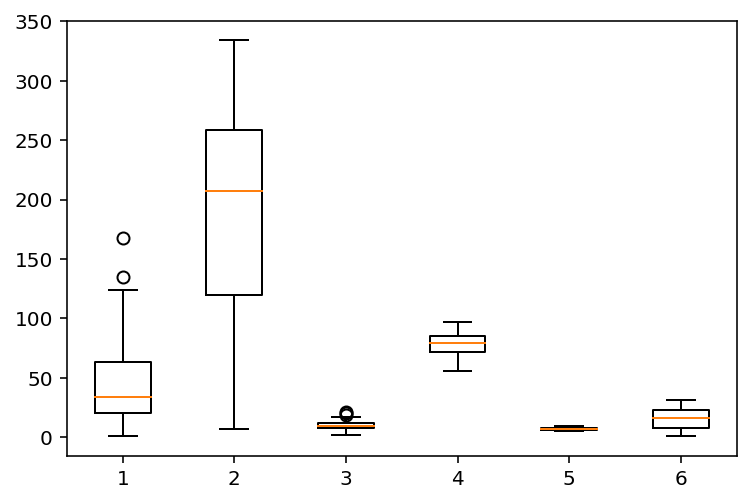

In [23]:
# 값 분포 확인
plt.boxplot([air['Ozone'], air['Solar.R'], air['Wind'], air['Temp'], air['Month'], air['Day']])
plt.show()

### 6.2.1. 표준화(Standardization)

- 첫 번째 방법은 **평균**과 **표준 편차**를 사용하는 것입니다.
- 각 값에서 해당 열의 평균값을 뺀 후 해당 열의 표준편차를 뺍니다.
- 평균이 0이고 표준편차가 1이 되는 값으로 변환됩니다.

**1) 모든 열 정규화**

- 데이터프레임의 모든 열을 정규화 하는 경우 구문이 단순합니다.

In [24]:
# 연습을 위해 원본 복사
air_bk = air.copy()

# 표준화
air = (air - air.mean()) / air.std()

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,-0.071862,0.032881,-0.725948,-1.149714,-1.407294,-1.670019
1,-0.228709,-0.772930,-0.555639,-0.621467,-1.407294,-1.557210
2,-0.981573,-0.425984,0.750066,-0.410168,-1.407294,-1.444401
3,-0.793357,1.409474,0.437832,-1.677961,-1.407294,-1.331592
4,-0.636511,1.357245,1.232609,-2.311857,-1.407294,-1.218782


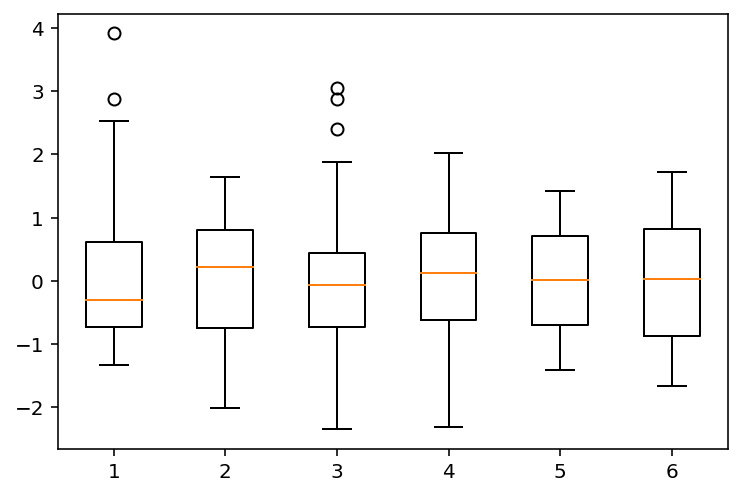

In [25]:
# 값 분포 확인
plt.boxplot([air['Ozone'], air['Solar.R'], air['Wind'], air['Temp'], air['Month'], air['Day']])
plt.show()

**2) 일부 열 표준화**

- 표준화가 필요한 열만 선택해 표준화를 할 수 있습니다.
- Solar.R, Wind, Temp 열만 표준화 합니다.

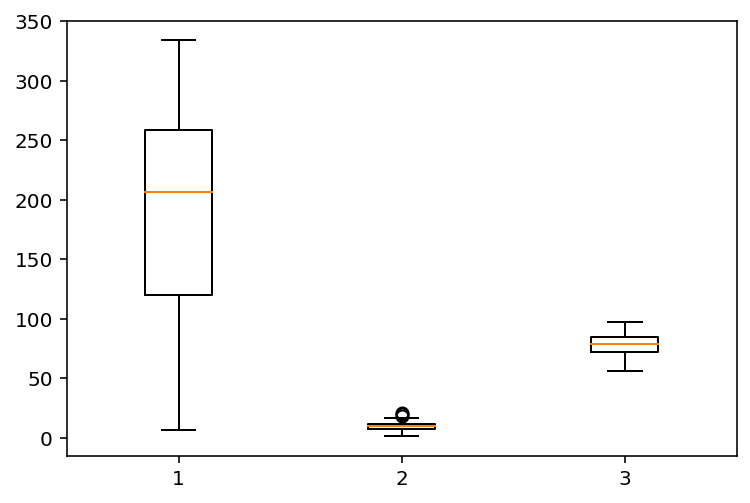

In [26]:
# 변경 복원
air = air_bk.copy()

# 값 분포 확인
plt.boxplot([air['Solar.R'], air['Wind'], air['Temp']])
plt.show()

In [27]:
# 표준화
air['Solar.R'] = (air['Solar.R'] - air['Solar.R'].mean()) / air['Solar.R'].std()
air['Wind'] = (air['Wind'] - air['Wind'].mean()) / air['Wind'].std()
air['Temp'] = (air['Temp'] - air['Temp'].mean()) / air['Temp'].std()

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,0.032881,-0.725948,-1.149714,5,1
1,36.0,-0.772930,-0.555639,-0.621467,5,2
2,12.0,-0.425984,0.750066,-0.410168,5,3
3,18.0,1.409474,0.437832,-1.677961,5,4
4,23.0,1.357245,1.232609,-2.311857,5,5


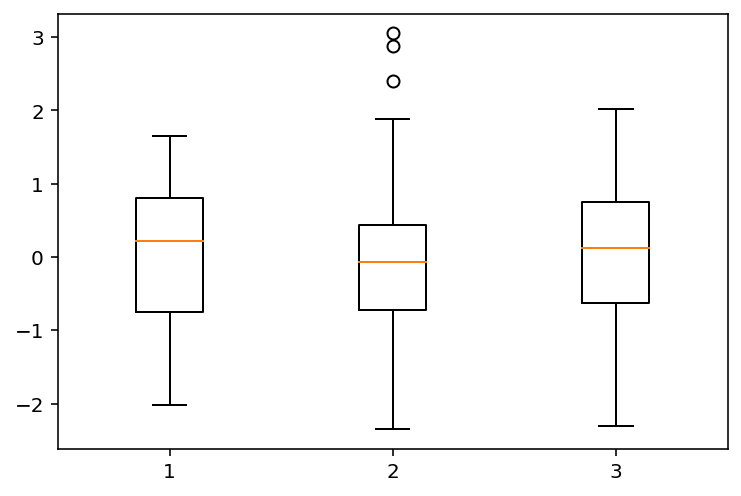

In [28]:
# 값 분포 확인
plt.boxplot([air['Solar.R'], air['Wind'], air['Temp']])
plt.show()

- 세 열을 한 번에 처리할 수 있습니다.
- 변수를 사용하면 구문이 길어짐을 방지할 수 있습니다.

In [29]:
# 변경 복원
air = air_bk.copy()

# 대상 열
cols = ['Solar.R', 'Wind', 'Temp']

# 표준화
air[cols] = (air[cols] - air[cols].mean()) / air[cols].std()

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,0.032881,-0.725948,-1.149714,5,1
1,36.0,-0.772930,-0.555639,-0.621467,5,2
2,12.0,-0.425984,0.750066,-0.410168,5,3
3,18.0,1.409474,0.437832,-1.677961,5,4
4,23.0,1.357245,1.232609,-2.311857,5,5


### 6.2.2. 정규화(Normalization)

- 두 번째 방법은 **최댓값**과 **최솟값**을 사용하는 것입니다.
- 각 값에서 해당 열의 최솟값을 뺸 후 해당 열의 최댓값과 최속값 차로 나눕니다.
- 가장 큰 값은 1로, 가장 작은 값은 0으로 변환됩니다.
- 결국 모든 값이 0과 1 사이의 값으로 변환됩니다.

**1) 모든 열 정규화**

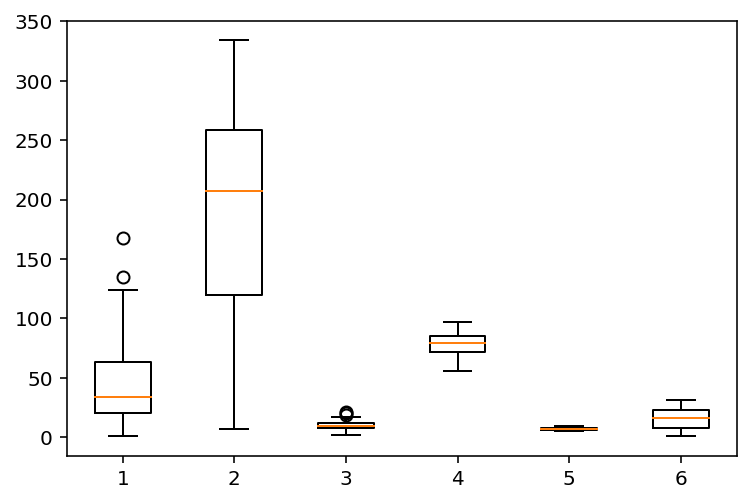

In [30]:
# 원본 복원
air = air_bk.copy()

# 값 분포 확인
plt.boxplot([air['Ozone'], air['Solar.R'], air['Wind'], air['Temp'], air['Month'], air['Day']])
plt.show()

In [31]:
# 정규화
air = (air - air.min()) / (air.max() - air.min())

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.239521,0.559633,0.300000,0.268293,0.0,0.000000
1,0.209581,0.339450,0.331579,0.390244,0.0,0.033333
2,0.065868,0.434251,0.573684,0.439024,0.0,0.066667
3,0.101796,0.935780,0.515789,0.146341,0.0,0.100000
4,0.131737,0.921509,0.663158,0.000000,0.0,0.133333


In [ ]:
# 값 분포 확인
plt.boxplot([air['Ozone'], air['Solar.R'], air['Wind'], air['Temp'], air['Month'], air['Day']])
plt.show()

**2) 일부열 정규화**

- Solar.R, Wind, Temp 열만 정규화 합니다.

In [ ]:
# 변경 복원
air = air_bk.copy()

# 값 분포 확인
plt.boxplot([air['Solar.R'], air['Wind'], air['Temp']])
plt.show()

In [ ]:
# 변경 복원
air = air_bk.copy()

# 대상 열
cols = ['Solar.R', 'Wind', 'Temp']

# 표준화
air[cols] = (air[cols] - air[cols].min()) / (air[cols].max() - air[cols].min())

# 확인
air.head()

In [ ]:
# 값 분포 확인
plt.boxplot([air['Solar.R'], air['Wind'], air['Temp']])
plt.show()

## 6.3. 가변수(Dummy Variable) 만들기

- 가변수는 일정하게 정해진 범위의 값을 갖는 데이터(범주형 데이터)를 독립된 열로 변환한 것입니다.
- 특히 범주형 문자열 데이터는 머신러닝 알고리즘에 사용하려면 숫자로 변환해야 합니다.
- 가변수를 만드는 과정을 **One-Hot-Encoding** 이라고 부르기도 합니다.
- **get_dummies()** 함수를 사용해서 가변수를 쉽게 만들 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dummy_variable.png' width=700 align="left"/>

In [ ]:
# titanic 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv'
titanic = pd.read_csv(file_path)

# 열 제거
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 확인
titanic.head()

### 6.3.1. 범주형 변수 확인

- 범주형 여부를 우선 확인해야 합니다.
- 문자열 값을 갖는 열이 범수형 값을 갖는 경우가 많습니다.

In [ ]:
# 열 확인
titanic.info()

- 문자열 데이터가 아닌 경우에도 변주형 값을 가질 수 있습니다.

In [ ]:
# Pclass 열에 어떤 값들이 몇 개씩 있나 확인
titanic['Pclass'].value_counts()

### 6.3.2. 변수 개별 처리

**1) 방법 #1**

- 대상 변수가 많지 않다면 변수 개별적으로 처리합니다.

In [ ]:
# 반복 학습을 위해 복사
titanic_bk = titanic.copy()

In [ ]:
# 가변수화
dumm = pd.get_dummies(titanic['Pclass'], prefix='Pclass')

# 확인
dumm.head()

- 다중공선성 문제를 없애기 위해 drop_first=True 옵션을 지정합니다.

In [ ]:
# 가변수화
dumm = pd.get_dummies(titanic['Pclass'], prefix='Pclass', drop_first=True)

# 확인
dumm.head()

- 가변수화 결과를 기존 데이터프레임에 연결합니다.

In [ ]:
# 기존 데이터프레임에 연결
titanic = pd.concat([titanic, dumm], axis=1)

# 확인
titanic.head()

- 원본 변수는 **필히** 제거합니다.

In [ ]:
# 원본 변수 제거
titanic.drop('Pclass', axis=1, inplace=True)

# 확인
titanic.head()

**2) 방법 #2**

- columns 옵션을 지정해 한 번에 처리할 수 있습니다.
- 자동으로 원본 열이 제거되고, 열 이름이 prefix로 사용됩니다.

In [ ]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# 데이터 확인
titanic.head()

In [ ]:
# 가변수화
titanic = pd.get_dummies(titanic, columns=['Pclass'], drop_first=True)

# 확인
titanic.head()

### 6.3.3. 일괄 처리

**1) 방법 #1**

- 대상 변수가 많다면 반복문을 사용해 한 번에 처리합니다.

In [ ]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# 데이터 확인
titanic.head()

In [ ]:
# 모든 범주형 변수를 가변수화
col_dumm = ['Pclass', 'Sex', 'Embarked']

for v in col_dumm:
    dumm = pd.get_dummies(titanic[v], prefix=v, drop_first=True)
    titanic = pd.concat([titanic, dumm], axis=1)
    titanic.drop(v, axis=1, inplace=True)

# 확인
titanic.head()

**2) 방법 #2**

- columns 옵션에 대상 열을 리스트로 지정해 한 번에 처리합니다.
- 자동으로 열 이름이 prefix로 지정되며 원본 열이 제거됩니다.
- columns 옵션을 지정하지 않으면 문자열 값을 갖는 열 모두를 대상으로 합니다.
- 구문이 짧으며 결과는 위 결과와 같습니다.

In [ ]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# 데이터 확인
titanic.head()

In [ ]:
# 모든 범주형 변수를 가변수화
col_dumm = ['Pclass', 'Sex', 'Embarked']
titanic = pd.get_dummies(titanic, columns=col_dumm, drop_first=True)

# 확인
titanic.head()

## 6.4. 참고: 학습용, 평가용 데이터 처리

- 머신러닝 모델링 과정에서는 학습용 데이터와 평가용 데이터를 나눕니다.
- 전처리 전에 데이터를 나눴으면 나눈 데이터 둘 다 개별벅으로 처리합니다.
- 학습용, 검증용, 평가용 데이터로 나눴으면 셋 다 개별적으로 처리합니다.

**1) 학습용, 검증용, 평가용 나누기**

In [ ]:
# 데이터프레임 원복
titanic = titanic_bk.copy()

# x, y 분리
target = 'Survived'
x = titanic.drop(target, axis=1)
y = titanic.loc[:, target]

# 학습용, 평가용 데이터 나누기
from sklearn.model_selection import train_test_split

# 6:2:2로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=2/8, random_state=1234)

# 확인
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

**2) 결측치 처리**

In [ ]:
# 결측치 확인
x_train.isna().sum()

- 범주형 변수를 최빈값으로 채웁니다.

In [ ]:
# 모듈 불러오기
from sklearn.impute import SimpleImputer

# 선언(최빈값 사용)
imputer = SimpleImputer(strategy='most_frequent')

# 범주형 변수 처리
cat_cols = ['Embarked']
x_train[cat_cols] = imputer.fit_transform(x_train[cat_cols])
x_valid[cat_cols] = imputer.fit_transform(x_valid[cat_cols])
x_test[cat_cols] = imputer.fit_transform(x_test[cat_cols])

- 연속형 변수를 중앙값으로 채웁니다.

In [ ]:
# 모듈 불러오기
from sklearn.impute import SimpleImputer

# 선언(중앙값 사용)
imputer = SimpleImputer(strategy='median')

# 연속형 변수 처리
num_cols = ['Age']
x_train[num_cols] = imputer.fit_transform(x_train[num_cols])
x_valid[num_cols] = imputer.fit_transform(x_valid[num_cols])
x_test[num_cols] = imputer.fit_transform(x_test[num_cols])

In [ ]:
# 학습용 확인
x_train.isna().sum()

In [ ]:
# 검증용 확인
x_valid.isna().sum()

In [ ]:
# 평가용 확인
x_test.isna().sum()

**3) 가변수화**

In [ ]:
# 가변수화
col_dumm = ['Pclass', 'Sex', 'Embarked']
x_train = pd.get_dummies(x_train, columns=col_dumm, drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=col_dumm, drop_first=True)
x_test = pd.get_dummies(x_test, columns=col_dumm, drop_first=True)

# 확인
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

In [ ]:
# 학습용 확인
x_train.head()

In [ ]:
# 검증용 확인
x_valid.head()

In [ ]:
# 평가용 확인
x_test.head()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>